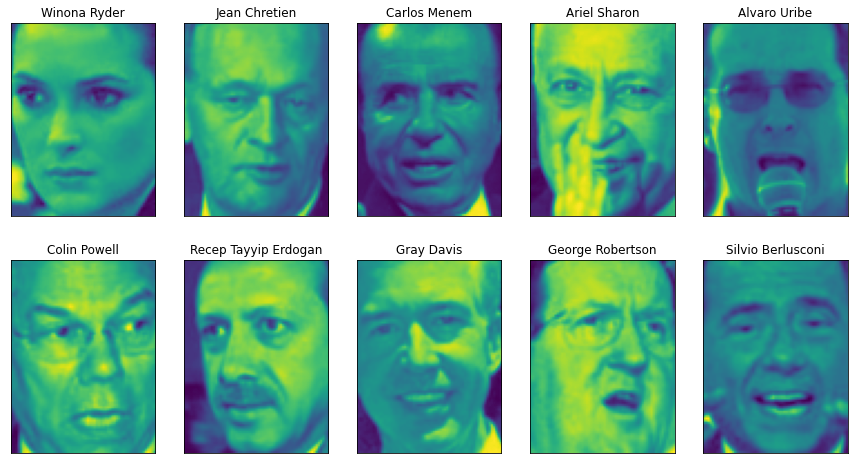

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fig, axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [5]:
import numpy as np
# to make data less skewed, will take up to 50 images of each person
mask = np.zeros(people.target.shape, dtype= bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale value to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people /255

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, PCA
from sklearn.cluster import KMeans
X_train, X_test, y_train, y_test=train_test_split(X_people,y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca= pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans= kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf= np.dot(nmf.transform(X_test), nmf.components_)

C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
C:\Users\Saina\AppData\Roaming\Python\Python39\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


Text(0, 0.5, 'nmf')

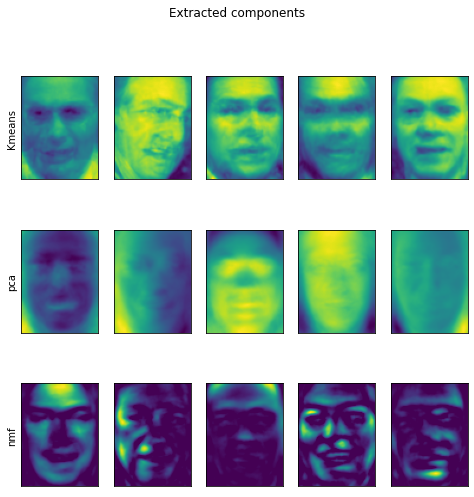

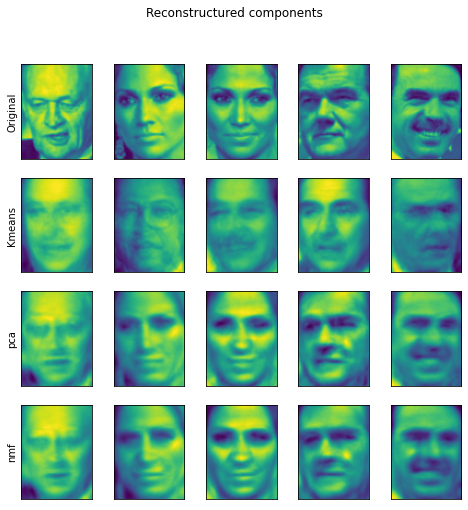

In [10]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,5, figsize = (8,8), subplot_kw={'xticks':(),'yticks':()})
fig.suptitle("Extracted components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(axes.T, kmeans.cluster_centers_,pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape),cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0,0].set_ylabel("Kmeans")
axes[1,0].set_ylabel("pca")
axes[2,0].set_ylabel("nmf")

fig, axes = plt.subplots(4,5, figsize = (8,8), subplot_kw={'xticks':(),'yticks':()})
fig.suptitle("Reconstructured components")
for ax,orig, rec_kmeans, rec_pca, rec_nmf in zip(axes.T,X_test, X_reconstructed_kmeans,X_reconstructed_pca,X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0,0].set_ylabel("Original")    
axes[1,0].set_ylabel("Kmeans")
axes[2,0].set_ylabel("pca")
axes[3,0].set_ylabel("nmf")